In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
ins_data=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\Insurance Dataset.csv")
ins_data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
#CONVERTING OBJECT TYPE TO INT TYPE
ins_data.replace({'Days_spend_hsptl': '120 +'}, 121, inplace=True)
ins_data['Days_spend_hsptl'].dtypes

dtype('O')

In [4]:
ins_data.Days_spend_hsptl = ins_data.Days_spend_hsptl.astype('int')
ins_data.Days_spend_hsptl.dtype

dtype('int32')

In [5]:
#renaming columns
ins_data.rename(columns={'Hospital County':'Hospital_County','Hospital Id':'Hospital_Id','Emergency dept_yes/No':'Emergency_dept','Home or self care,':'Home_or_self_care'},inplace=True)
ins_data.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [6]:
#droping duplicate values
ins_dup=ins_data.drop_duplicates(subset=None, keep='first', inplace=False)
ins_dup.shape

(1043761, 24)

In [7]:
#droping null values
output=ins_dup.dropna()
output.head(2)

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1


In [8]:
#dropping columns
ins_data_2=output.drop(['Hospital_Id','Area_Service','Hospital_County','Mortality risk','Cultural_group','apr_drg_description','ethnicity','Weight_baby','Abortion','Home_or_self_care','ccs_procedure_code','ratio_of_total_costs_to_total_charges'],axis=1)
ins_data_2

,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Surg_Description,Emergency_dept,Tot_charg,Tot_cost,Result,Payment_Typology
0,30 to 49,F,4,Elective,122,1,Medical,Y,5511.95,5582.49,1,1
1,70 or Older,F,4,Urgent,197,3,Medical,Y,4783.20,5162.82,1,1
2,30 to 49,F,3,Urgent,122,1,Medical,Y,3829.15,4056.52,1,1
3,0 to 17,F,1,Urgent,122,1,Medical,Y,1108.20,1644.75,0,1
4,70 or Older,F,3,Elective,122,2,Medical,Y,3418.18,3370.87,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,70 or Older,F,6,Emergency,106,2,Medical,Y,69650.41,13896.82,1,3
1048571,0 to 17,F,2,Emergency,8,2,Medical,N,13587.38,3918.35,1,3
1048572,50 to 69,M,13,Emergency,151,4,Medical,Y,104629.78,24746.64,0,3
1048573,30 to 49,F,2,Emergency,143,1,Surgical,Y,27521.41,6766.04,1,3


In [9]:
#mapping the categorical data
age_dict={'0 to 17':1, '18 to 29':2,'30 to 49':3,'50 to 69':4,'70 or Older':5}
ins_data_2['Age']=ins_data_2.Age.map(age_dict)
gender_dict={'F':0, 'M':1, 'U':2}
ins_data_2['Gender']=ins_data_2.Gender.map(gender_dict)
admission_type_dict={'Elective':0, 'Urgent':1, 'Emergency':2, 'Newborn':3, 'Not Available':5,'Trauma':4}
ins_data_2['Admission_type']=ins_data_2.Admission_type.map(admission_type_dict)
surg_description_dict={'Medical':0, 'Surgical':1}
ins_data_2['Surg_Description']=ins_data_2.Surg_Description.map(surg_description_dict)
emergency_dept_dict={'Y':0, 'N':1}
ins_data_2['Emergency_dept']=ins_data_2.Emergency_dept.map(emergency_dept_dict)
ins_data_2

,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Surg_Description,Emergency_dept,Tot_charg,Tot_cost,Result,Payment_Typology
0,3,0,4,0,122,1,0,0,5511.95,5582.49,1,1
1,5,0,4,1,197,3,0,0,4783.20,5162.82,1,1
2,3,0,3,1,122,1,0,0,3829.15,4056.52,1,1
3,1,0,1,1,122,1,0,0,1108.20,1644.75,0,1
4,5,0,3,0,122,2,0,0,3418.18,3370.87,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5,0,6,2,106,2,0,0,69650.41,13896.82,1,3
1048571,1,0,2,2,8,2,0,1,13587.38,3918.35,1,3
1048572,4,1,13,2,151,4,0,0,104629.78,24746.64,0,3
1048573,3,0,2,2,143,1,1,0,27521.41,6766.04,1,3


In [10]:
#DECLARING FEATURE AND TARGET VARIABLES
X=ins_data_2.drop('Result',axis=1)
y=ins_data_2[['Result']]

In [11]:
X

,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Surg_Description,Emergency_dept,Tot_charg,Tot_cost,Payment_Typology
0,3,0,4,0,122,1,0,0,5511.95,5582.49,1
1,5,0,4,1,197,3,0,0,4783.20,5162.82,1
2,3,0,3,1,122,1,0,0,3829.15,4056.52,1
3,1,0,1,1,122,1,0,0,1108.20,1644.75,1
4,5,0,3,0,122,2,0,0,3418.18,3370.87,1
...,...,...,...,...,...,...,...,...,...,...,...
1048570,5,0,6,2,106,2,0,0,69650.41,13896.82,3
1048571,1,0,2,2,8,2,0,1,13587.38,3918.35,3
1048572,4,1,13,2,151,4,0,0,104629.78,24746.64,3
1048573,3,0,2,2,143,1,1,0,27521.41,6766.04,3


In [12]:
y

,Result
0,1
1,1
2,1
3,0
4,1
...,...
1048570,1
1048571,1
1048572,0
1048573,1


In [13]:
#performing random oversampling
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_os, y_os = os.fit_resample(X, y)
X_os.shape,y_os.shape

((1560722, 11), (1560722, 1))

In [14]:
y_os.value_counts()

Result
0         780361
1         780361
dtype: int64

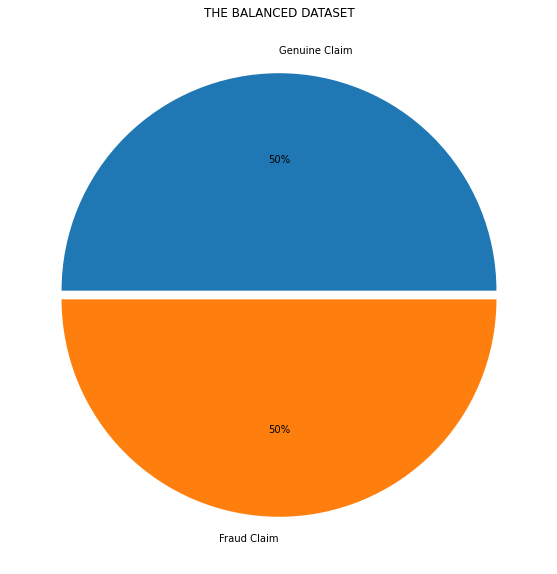

In [15]:
plt.figure(figsize=(10,10))
plt.pie(y_os.value_counts(),labels=['Genuine Claim','Fraud Claim'],explode=[0.02,0.02],autopct='%1.0f%%')
plt.title("THE BALANCED DATASET")
plt.show()

In [16]:
# Here the data will be divided into training and testing data set.
# let's take training data = 80%
# let's take testing data = 20%
# using train-test-split we split the data 

In [17]:
# performing random forest classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.20,random_state=15,stratify=y_os)

In [20]:
%%time
rf_classifier=RandomForestClassifier(n_estimators=60,random_state=15)
rf_classifier.fit(X_train,y_train)

Wall time: 4min 2s


RandomForestClassifier(n_estimators=60, random_state=15)

In [21]:
# TRAINING THE DATA

In [22]:
y_pred_train_rf=rf_classifier.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("THE ACCURACY OF TRAINING DATA :",accuracy_score(y_train,y_pred_train_rf))
print("===========================================================")
print("THE CLASSIFICATION REPORT OF TRAINING DATA :",classification_report(y_train,y_pred_train_rf))
print("===========================================================")
print("THE CONFUSION MATRIX OF TRAINING DATA :",confusion_matrix(y_train,y_pred_train_rf))

THE ACCURACY OF TRAINING DATA : 0.9910858521340694
THE CLASSIFICATION REPORT OF TRAINING DATA :               precision    recall  f1-score   support

           0       0.99      0.99      0.99    624288
           1       0.99      0.99      0.99    624289

    accuracy                           0.99   1248577
   macro avg       0.99      0.99      0.99   1248577
weighted avg       0.99      0.99      0.99   1248577

THE CONFUSION MATRIX OF TRAINING DATA : [[620960   3328]
 [  7802 616487]]


In [24]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_os,rf_classifier.predict_proba(X_os)[:,1])
auc_training=roc_auc_score(y_train,y_pred_train_rf)
print("THE AREA UNDER CURVE OF TRAINING DATA :",auc_training)

THE AREA UNDER CURVE OF TRAINING DATA : 0.9910858550039542


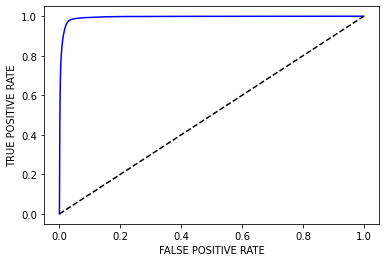

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',label='logit model(area=%0.2f)'%auc_training)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.show()

In [26]:
#TESTING THE DATA

In [27]:
y_pred_test_rf=rf_classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("THE ACCURACY OF TRAINING DATA :",accuracy_score(y_test,y_pred_test_rf))
print("===========================================================")
print("THE CLASSIFICATION REPORT OF TRAINING DATA :",classification_report(y_test,y_pred_test_rf))
print("===========================================================")
print("THE CONFUSION MATRIX OF TRAINING DATA :",confusion_matrix(y_test,y_pred_test_rf))

THE ACCURACY OF TRAINING DATA : 0.8667574364478047
THE CLASSIFICATION REPORT OF TRAINING DATA :               precision    recall  f1-score   support

           0       0.83      0.91      0.87    156073
           1       0.91      0.82      0.86    156072

    accuracy                           0.87    312145
   macro avg       0.87      0.87      0.87    312145
weighted avg       0.87      0.87      0.87    312145

THE CONFUSION MATRIX OF TRAINING DATA : [[142759  13314]
 [ 28277 127795]]


In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_os,rf_classifier.predict_proba(X_os)[:,1])
auc_testing=roc_auc_score(y_test,y_pred_test_rf)
print("THE AREA UNDER CURVE OF TRAINING DATA :",auc_testing)

THE AREA UNDER CURVE OF TRAINING DATA : 0.8667572828766047


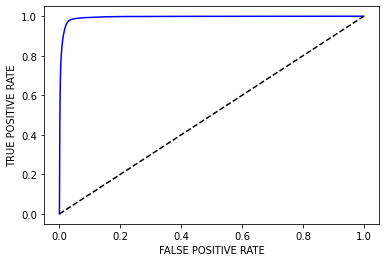

In [30]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',label='logit model(area=%0.2f)'%auc_testing)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.show()

In [31]:
input_data = (5,0,3,0,122,2,0,0,3418.18,3370.87,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The claim is fraud')
else:
  print('The claim is genuine')

[1]
The claim is genuine


In [32]:
# SAVING THE TRAINED MODEL

In [33]:
import pickle

In [34]:
filename="trained_model.sav"
pickle.dump(rf_classifier,open(filename,'wb'))

In [38]:
#loading the saved model
loaded_model=pickle.load(open("trained_model.sav",'rb'))
loaded_model

RandomForestClassifier(n_estimators=60, random_state=15)

In [40]:
input_data = (5,0,3,0,122,2,0,0,3418.18,3370.87,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The claim is fraud')
else:
  print('The claim is genuine')

[1]
The claim is genuine
